In [459]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd 
import pyhrv
from scipy.fft import fft, fftfreq

In [460]:
df = pd.read_csv("Rafaelnon.txt",sep='\s+',header= None)
df=pd.DataFrame(df)
x = np.arange(len(df))/100
y = np.array(df[df.columns[0]])
y = y 

Text(0, 0.5, 'Amplitude (V)')

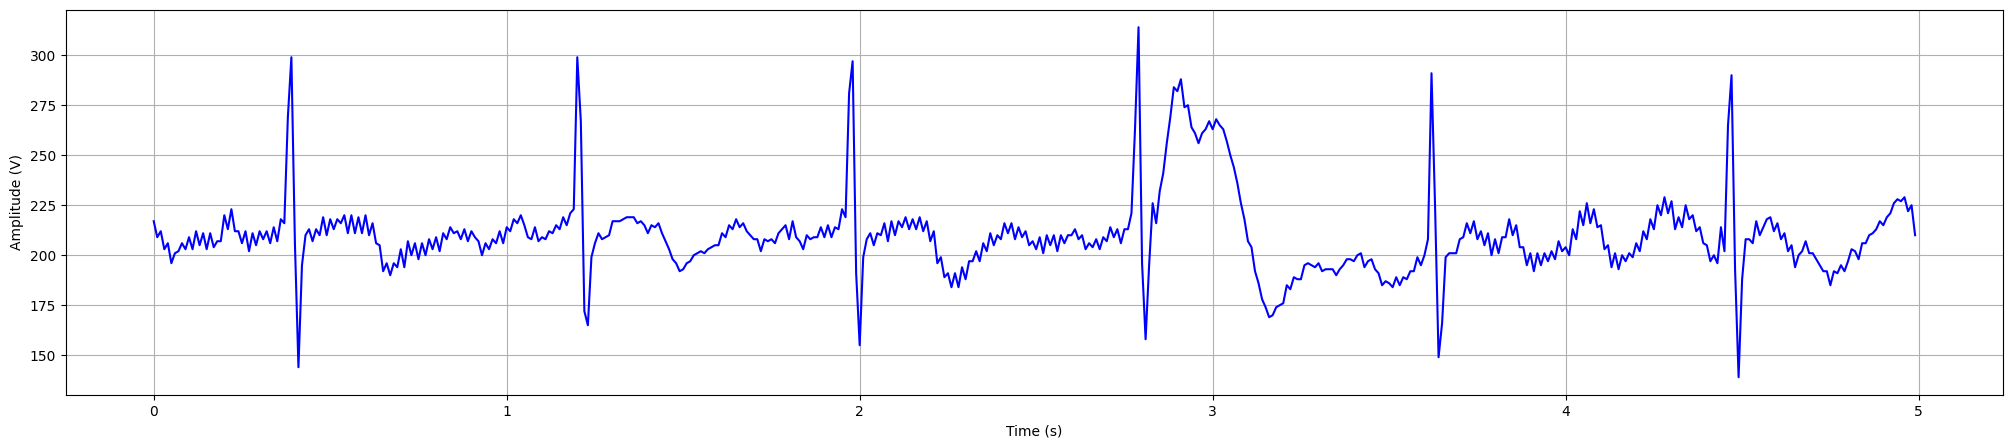

In [461]:
plt.rcParams["figure.figsize"] = (25,5)
plt.plot(x[0:500],y[0:500],color="b")
plt.grid()
plt.xlabel("Time (s)")
plt.ylabel("Amplitude (V)")

In [462]:
fs=int(round(1/(x[1]-x[0])))
fs 

100

In [463]:
jumlahdata = int(np.size(x))
jumlahdata

12000

In [464]:
def dirac(x):
    if (x ==0):
        dirac_delta = 1
    else:
        dirac_delta = 0 
    return dirac_delta

In [465]:
h = []
g = []
n_list = []

for n in range(-2,2):
    n_list.append(n)
    temp_h = 1/8 * (dirac(n-1) + 3*dirac(n) + 3*dirac(n+1) + dirac(n+2))
    h.append(temp_h)
    temp_g = -2 * (dirac(n)-dirac(n+1))
    g.append(temp_g)

h(n)


<BarContainer object of 4 artists>

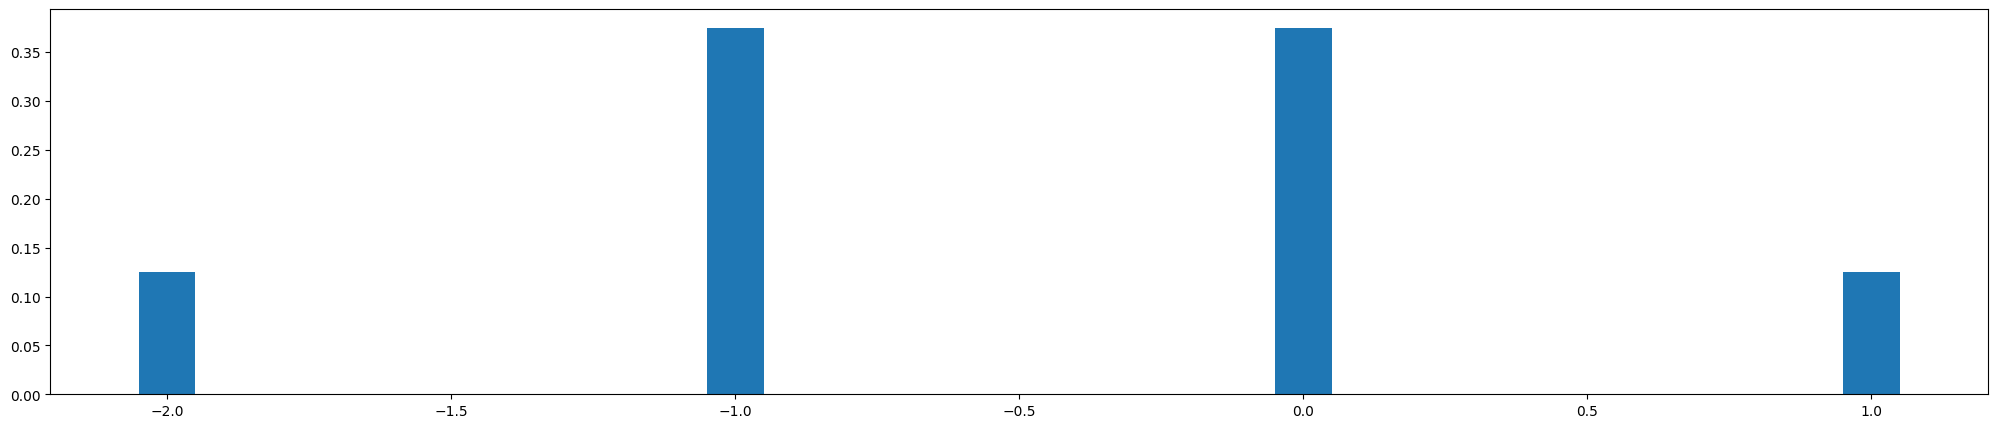

In [466]:
print("h(n)")
plt.bar(n_list,h,0.1)

g(n)


<BarContainer object of 4 artists>

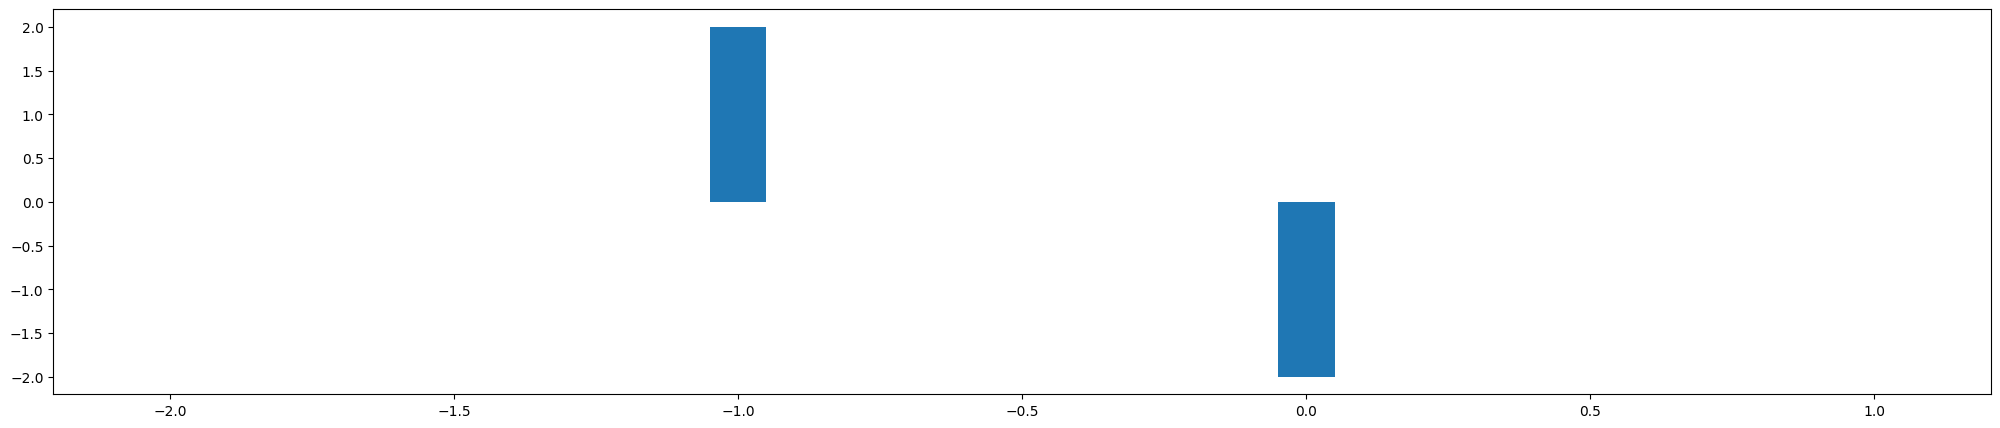

In [467]:
print("g(n)")
plt.bar(n_list,g,0.1)

In [468]:
Hw = np.zeros(20000)
Gw = np.zeros(20000)
i_list = []

for i in range(0,fs+1):
    i_list.append(i)
    reG = 0
    imG = 0 
    reH = 0
    imH = 0 
    for k in range(-2,2):
        reG += g[k+2] * np.cos(k*2*np.pi*i/fs)
        imG -= g[k+2] * np.sin(k*2*np.pi*i/fs) 
        reH += h[k+2] * np.cos(k*2*np.pi*i/fs)
        imH -= h[k+2] * np.sin(k*2*np.pi*i/fs)
    Hw[i] = np.sqrt((reH**2) + (imH**2))
    Gw[i] = np.sqrt((reG**2) + (imG**2))

i_list = i_list[0:round(fs/2)]

Hw


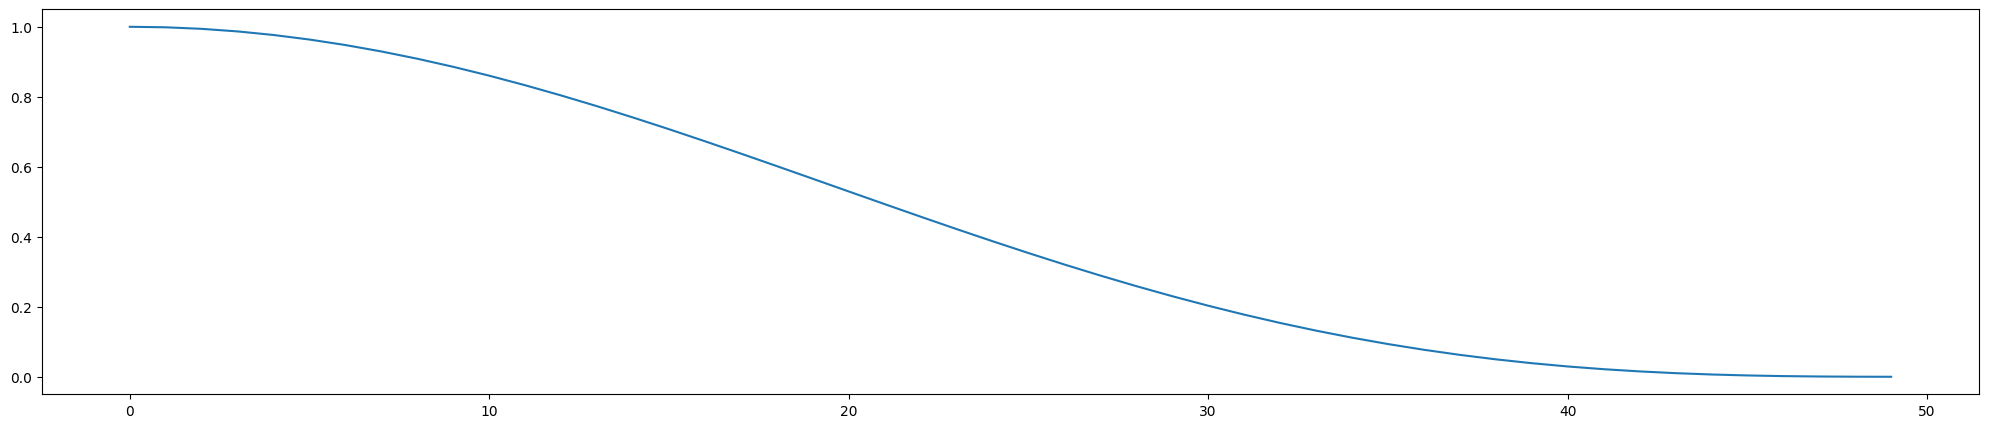

In [469]:
print("Hw")
plt.plot(i_list,Hw[0:len(i_list)])

Gw


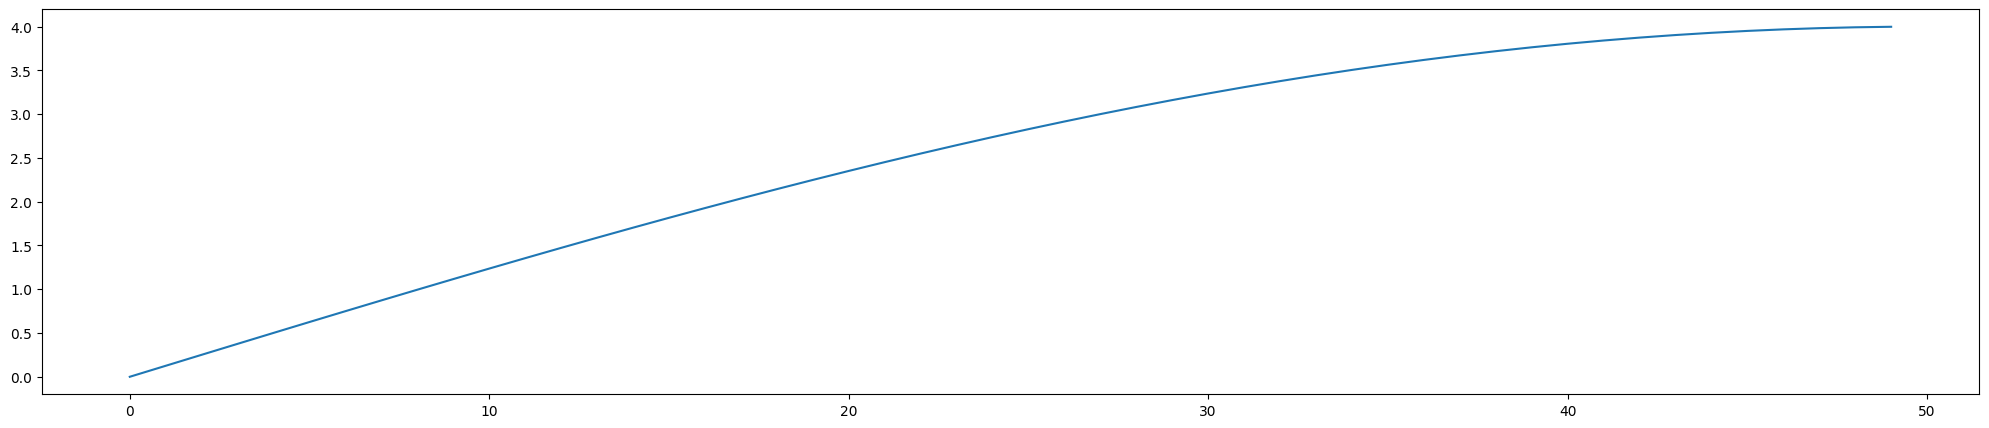

In [470]:
print("Gw")
plt.plot(i_list,Gw[0:len(i_list)])

In [471]:
w2fm = np.zeros((5,jumlahdata))
s2fm = np.zeros((5,jumlahdata))

for n in range(jumlahdata):
    for j in range(1,6):
        for k in range(-2,2):
            try:
                w2fm[j-1,n] += g[k+2] * y[round(n-np.power(2,j-1)*k)]
                s2fm[j-1,n] += h[k+2] * y[round(n-np.power(2,j-1)*k)]
            except:
                w2fm[j-1,n] += 0 
                s2fm[j-1,n] += 0



Text(0.5, 1.0, 's2f5')

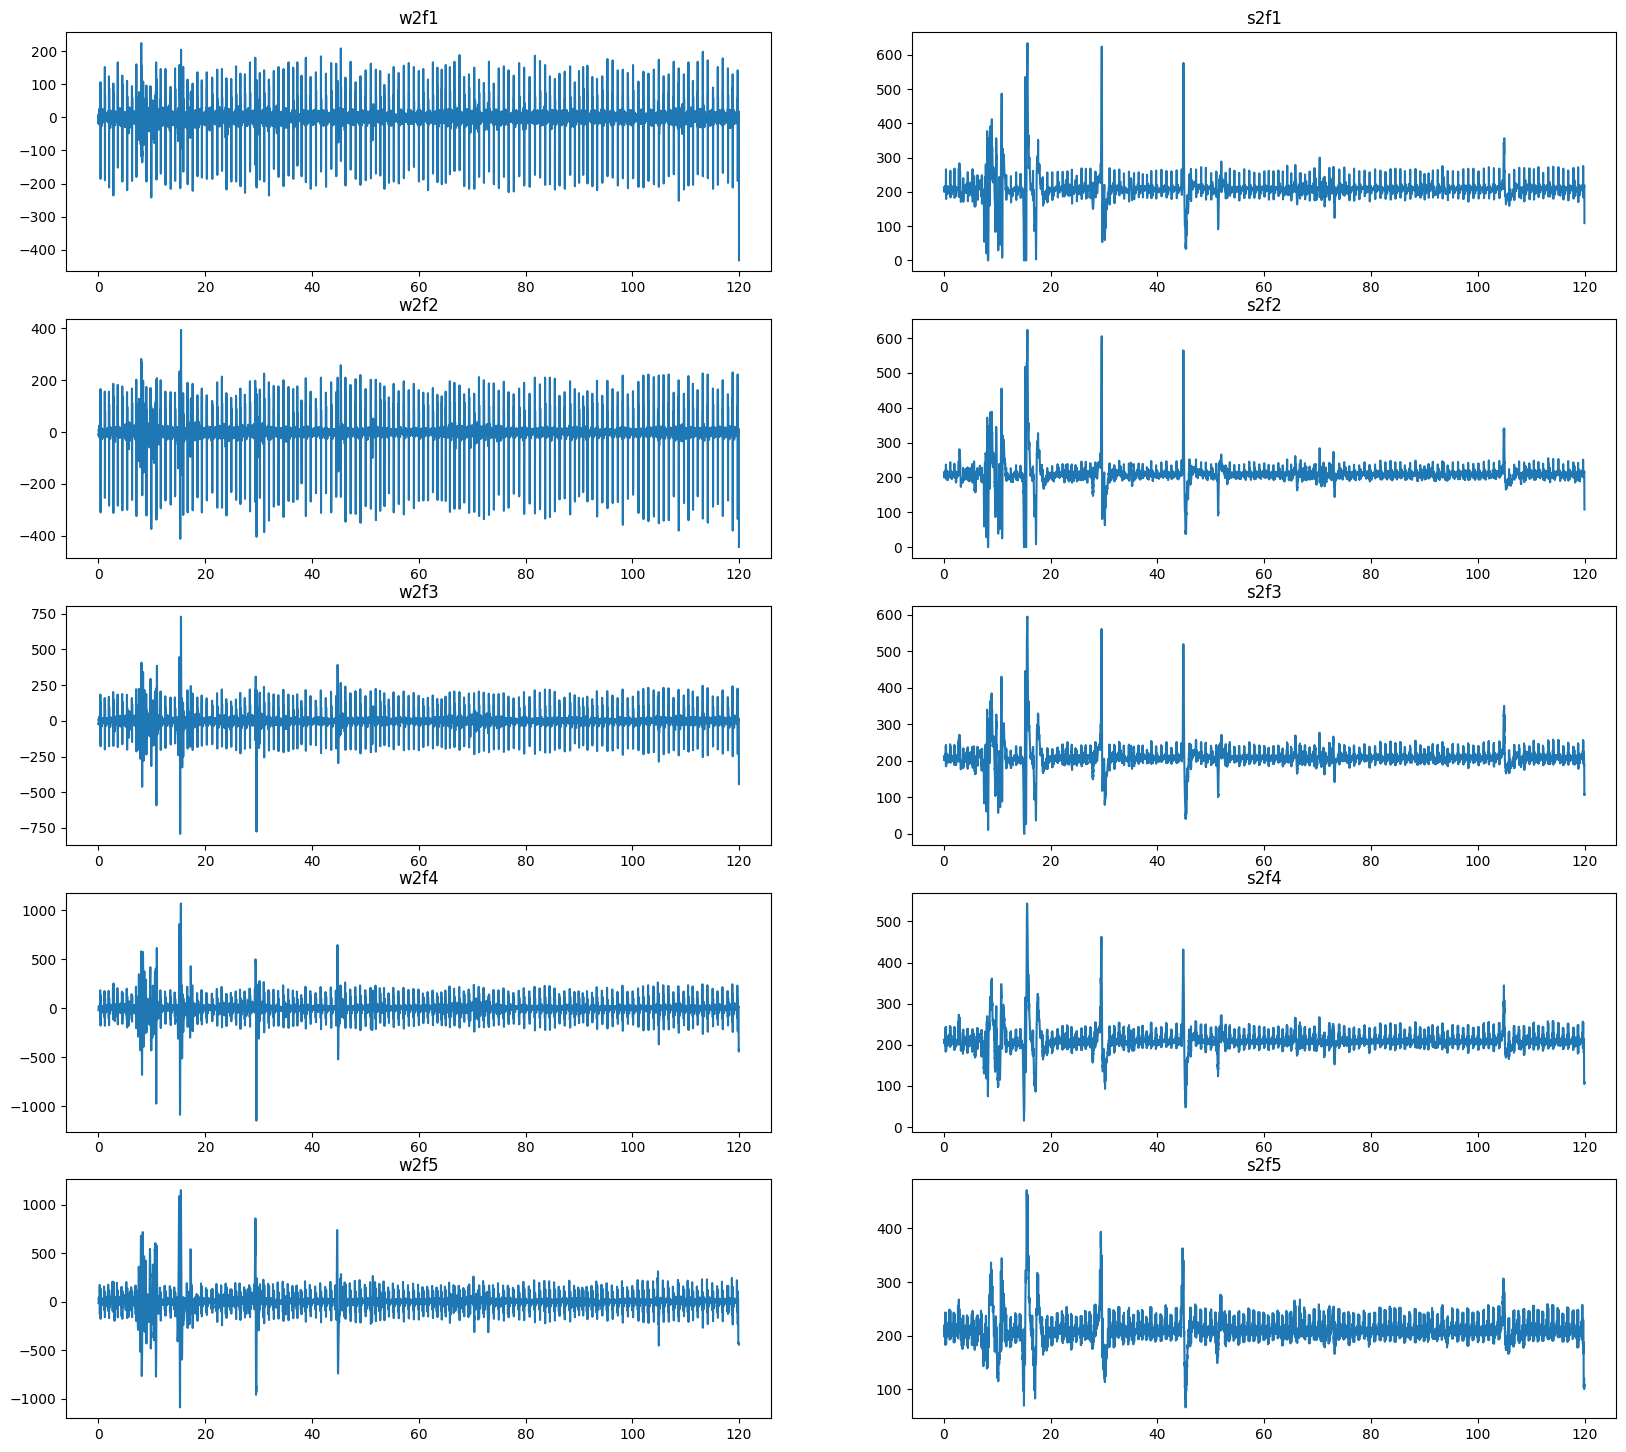

In [472]:
n = np.arange(jumlahdata)
fig, axs = plt.subplots(5,2,figsize=(20,18))
axs[0,0].plot(n/fs,w2fm[0,n])
axs[0,0].set_title("w2f1")
axs[0,1].plot(n/fs,s2fm[0,n])
axs[0,1].set_title("s2f1")
axs[1,0].plot(n/fs,w2fm[1,n])
axs[1,0].set_title("w2f2")
axs[1,1].plot(n/fs,s2fm[1,n])
axs[1,1].set_title("s2f2")
axs[2,0].plot(n/fs,w2fm[2,n])
axs[2,0].set_title("w2f3")
axs[2,1].plot(n/fs,s2fm[2,n])
axs[2,1].set_title("s2f3")
axs[3,0].plot(n/fs,w2fm[3,n])
axs[3,0].set_title("w2f4")
axs[3,1].plot(n/fs,s2fm[3,n])
axs[3,1].set_title("s2f4")
axs[4,0].plot(n/fs,w2fm[4,n])
axs[4,0].set_title("w2f5")
axs[4,1].plot(n/fs,s2fm[4,n])
axs[4,1].set_title("s2f5")

In [473]:
Q = np.zeros((9,round(fs/2)+1))

In [474]:
i_list = []
for i in range(0,round(fs/2)+1):
    i_list.append(i)
    Q[1][i] = Gw[i]
    Q[2][i] = Gw[2*i]*Hw[i]
    Q[3][i] = Gw[4*i]*Hw[2*i]*Hw[i]
    Q[4][i] = Gw[8*i]*Hw[4*i]*Hw[2*i]*Hw[i]
    Q[5][i] = Gw[16*i]*Hw[8*i]*Hw[4*i]*Hw[2*i]*Hw[i]
    Q[6][i] = Gw[32*i]*Hw[16*i]*Hw[8*i]*Hw[4*i]*Hw[2*i]*Hw[i]
    Q[7][i] = Gw[64*i]*Hw[32*i]*Hw[16*i]*Hw[8*i]*Hw[4*i]*Hw[2*i]*Hw[i]
    Q[8][i] = Gw[128*i]*Hw[64*i]*Hw[32*i]*Hw[16*i]*Hw[8*i]*Hw[4*i]*Hw[2*i]*Hw[i]

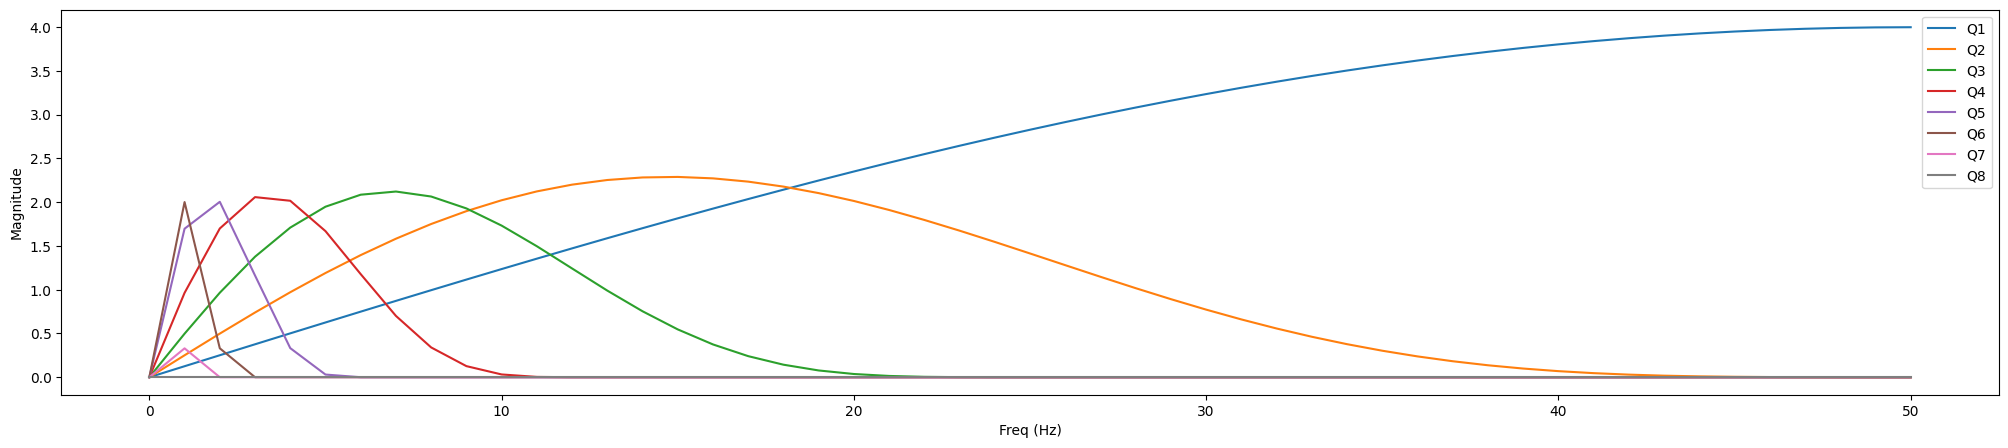

In [475]:
for i in range(1,9):
    line_label = "Q{}".format(i)
    plt.plot(i_list,Q[i],label = line_label)
plt.legend()
plt.xlabel("Freq (Hz)")
plt.ylabel("Magnitude")
plt.show()


In [476]:
qj = np.zeros((6,100000))

a =  -1
b = 1


<BarContainer object of 2 artists>

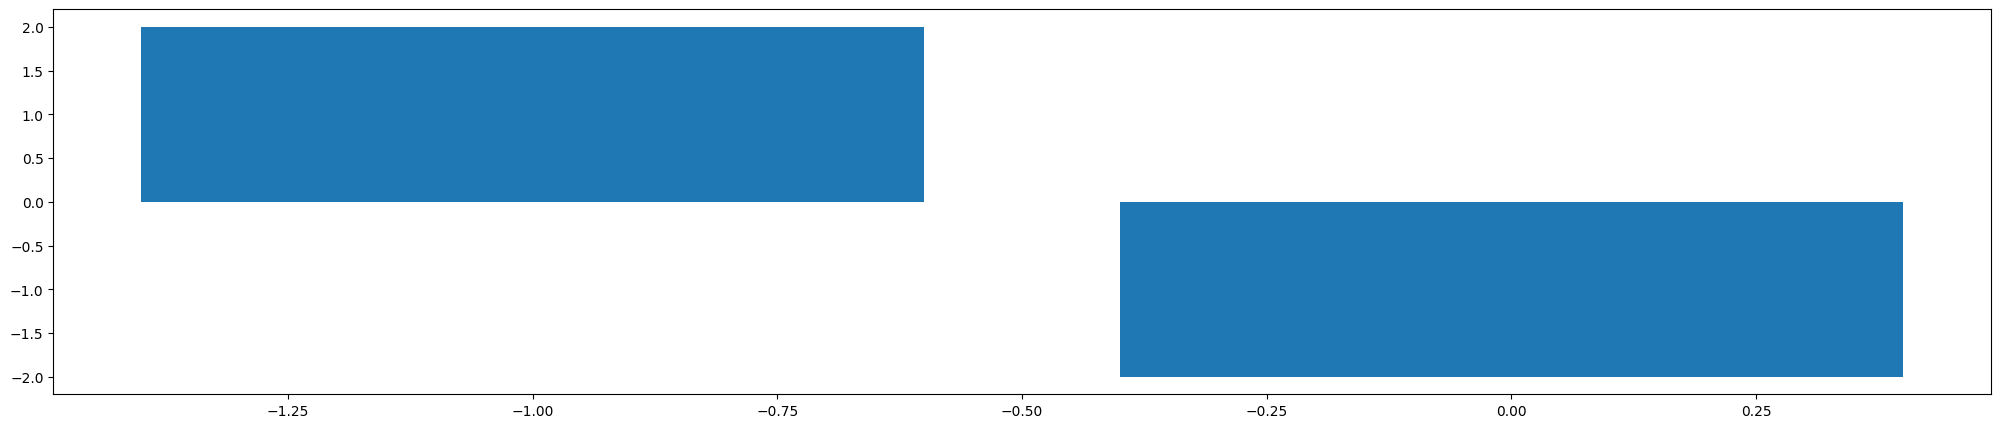

In [477]:
k_list = []
j = 1

a = -(round(2**j) + round(2**(j-1))-2)
print("a = ",a)

b = -(1-round(2**(j-1))) + 1
print("b =",b)

for k in range(a,b):
    k_list.append(k)
    qj[1,k+abs(a)] = -2*(dirac(k)-dirac(k+1))

plt.bar(k_list,qj[1][0:len(k_list)])


a =  -4
b = 2


<BarContainer object of 6 artists>

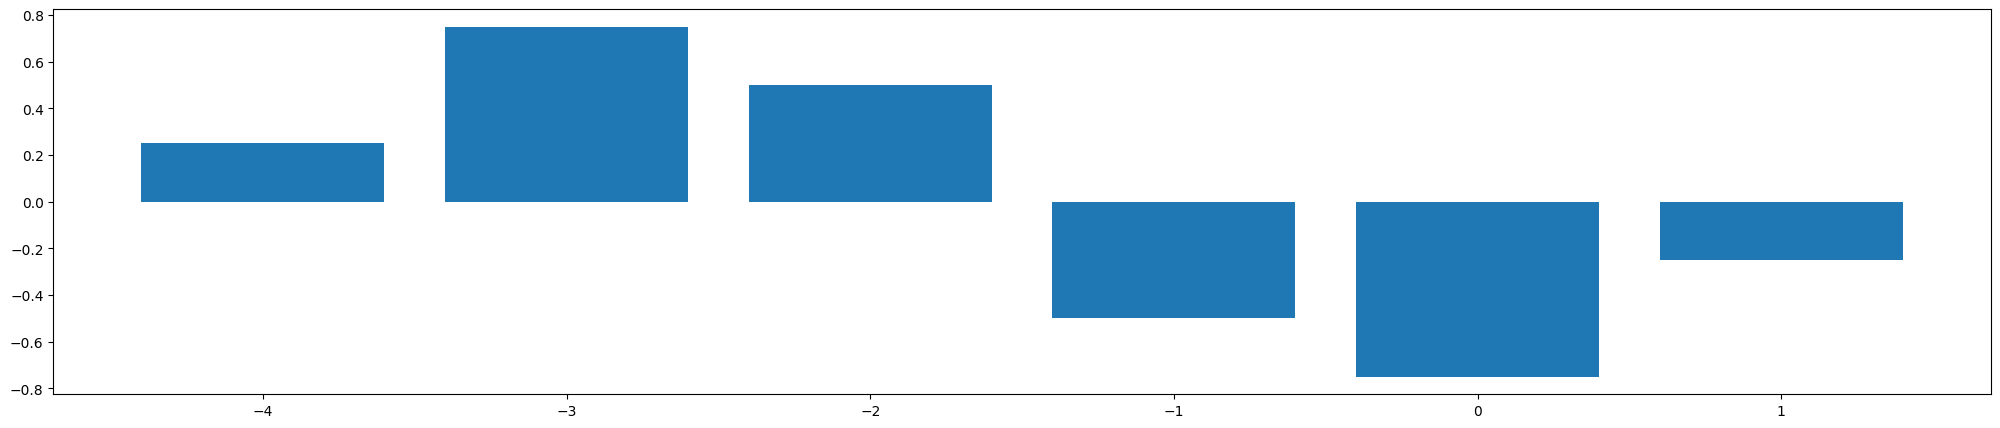

In [478]:
k_list = []
j = 2

a = -(round(2**j) + round(2**(j-1))-2)
print("a = ",a)

b = -(1-round(2**(j-1))) + 1
print("b =",b)

for k in range(a,b):
    k_list.append(k)
    qj[2,k+abs(a)] = -1/4*(dirac(k-1)+3*dirac(k)+2*dirac(k+1)-2*dirac(k+2)
    -3*dirac(k+3)-dirac(k+4))

plt.bar(k_list,qj[2][0:len(k_list)])

a =  -10
b = 4


<BarContainer object of 14 artists>

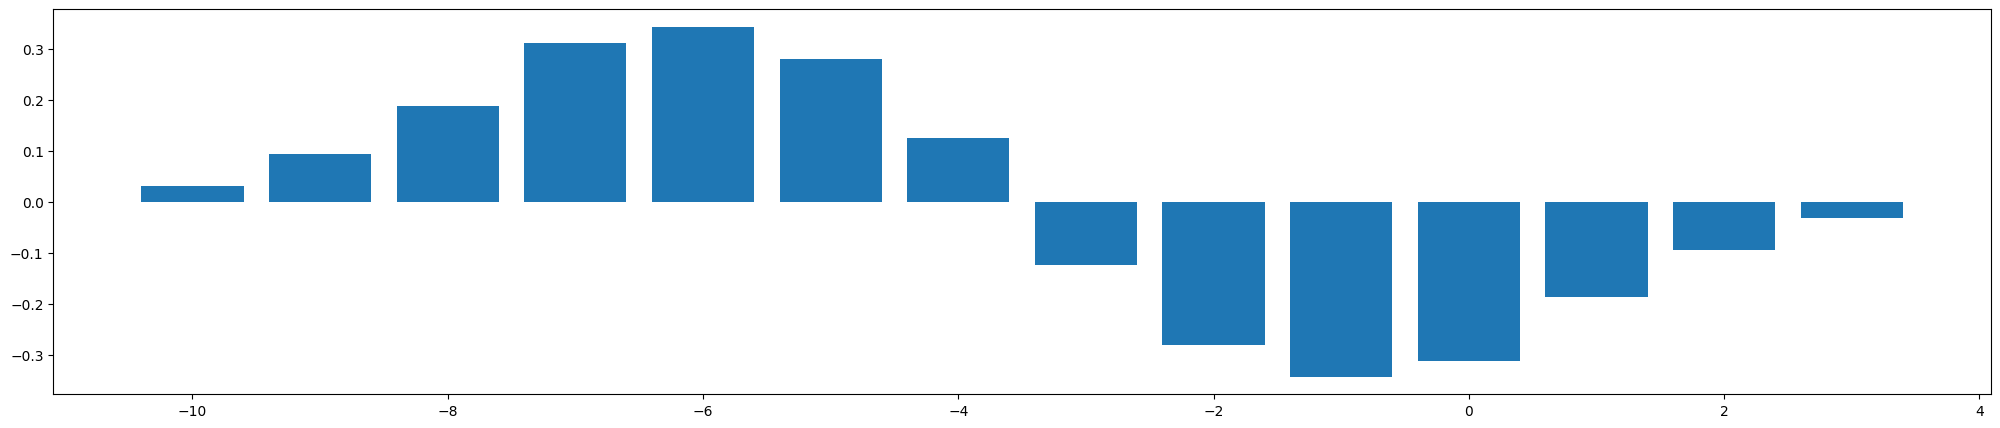

In [479]:
k_list = []
j = 3

a = -(round(2**j) + round(2**(j-1))-2)
print("a = ",a)

b = -(1-round(2**(j-1))) + 1
print("b =",b)

for k in range(a,b):
    k_list.append(k)
    qj[3,k+abs(a)] = -1/32*(dirac(k-3)+3*dirac(k-2)+6*dirac(k-1)+10*dirac(k)
    +11*dirac(k+1)+9*dirac(k+2)+4*dirac(k+3)-4*dirac(k+4)-9*dirac(k+5)
    -11*dirac(k+6)-10*dirac(k+7)-6*dirac(k+8)-3*dirac(k+9)-dirac(k+10))

plt.bar(k_list,qj[3][0:len(k_list)])

a =  -22
b = 8


<BarContainer object of 30 artists>

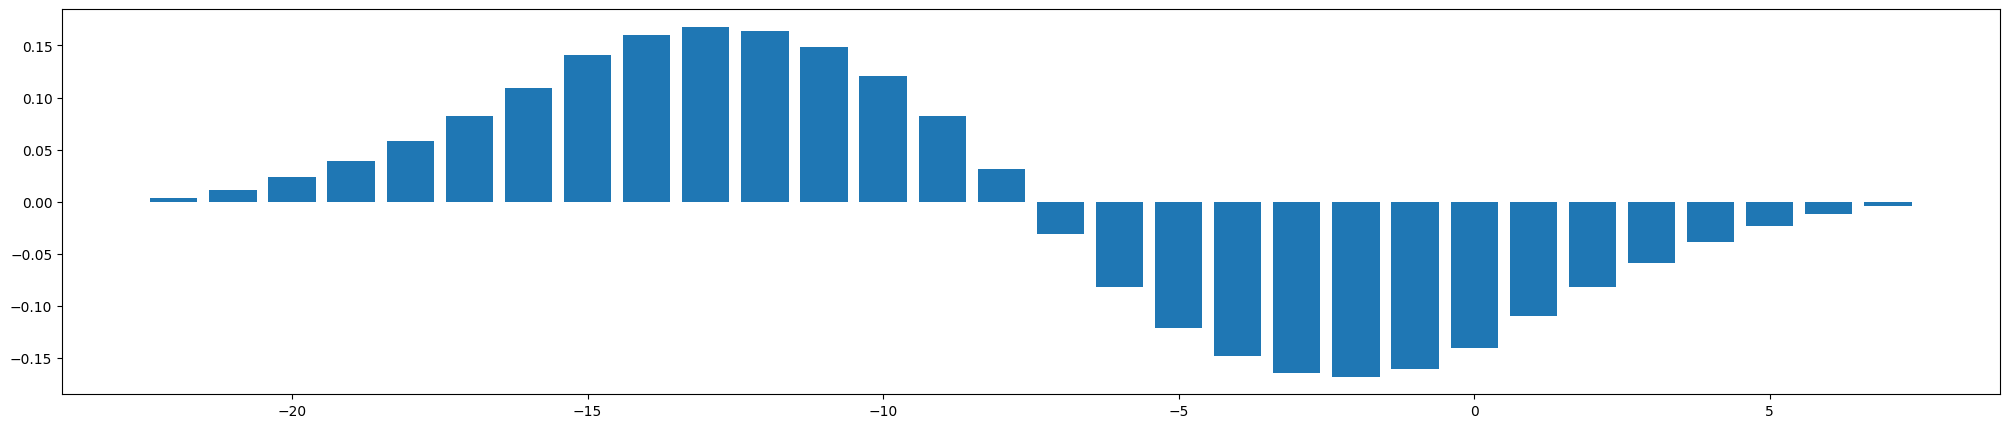

In [480]:
k_list = []
j = 4

a = -(round(2**j) + round(2**(j-1))-2)
print("a = ",a)

b = -(1-round(2**(j-1))) + 1
print("b =",b)

for k in range(a,b):
    k_list.append(k)
    qj[4,k+abs(a)] = -1/256*(dirac(k-7)+3*dirac(k-6)+6*dirac(k-5)+10*dirac(k-4)+15*dirac(k-3)
    +21*dirac(k-2)+28*dirac(k-1)+36*dirac(k)+41*dirac(k+1)+43*dirac(k+2)
    +42*dirac(k+3)+38*dirac(k+4)+31*dirac(k+5)+21*dirac(k+6)+8*dirac(k+7)
    -8*dirac(k+8)-21*dirac(k+9)-31*dirac(k+10)-38*dirac(k+11)-42*dirac(k+12)
    -43*dirac(k+13)-41*dirac(k+14)-36*dirac(k+15)-28*dirac(k+16)-21*dirac(k+17)
    -15*dirac(k+18)-10*dirac(k+19)-6*dirac(k+20)-3*dirac(k+21) -dirac(k+22))


plt.bar(k_list,qj[4][0:len(k_list)])



a =  -46
b = 16


<BarContainer object of 62 artists>

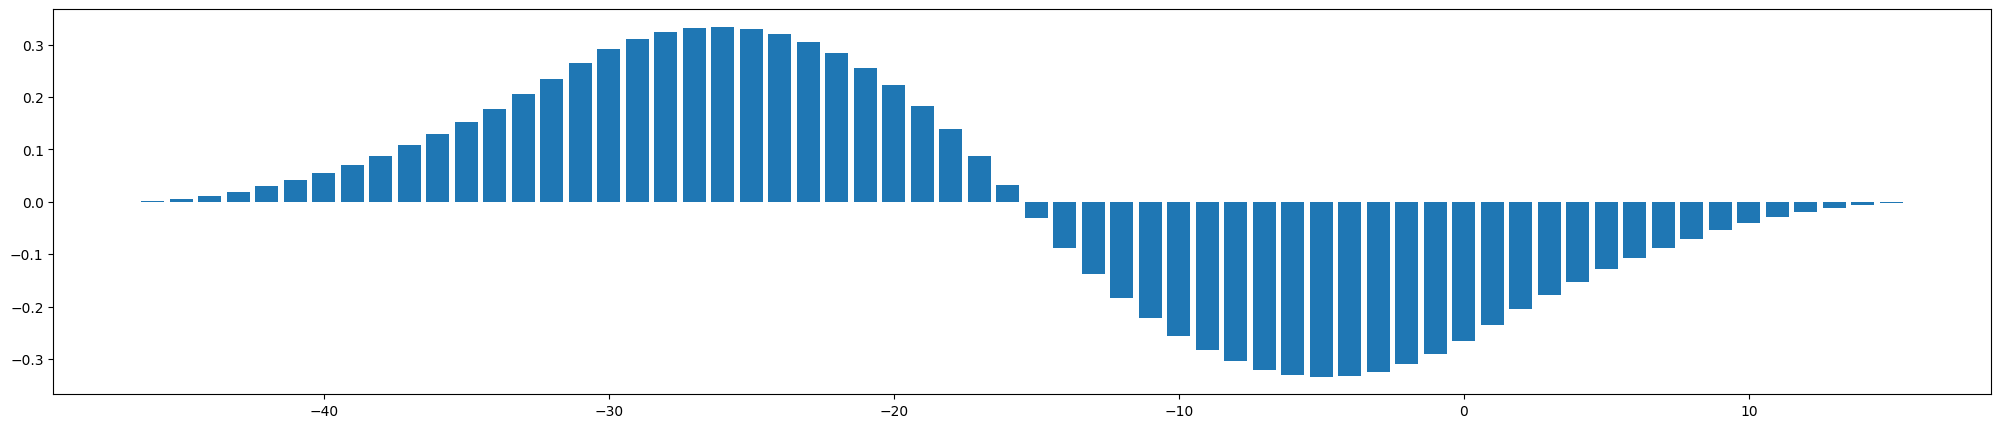

In [481]:
k_list = []
j = 5

a = -(round(2**j) + round(2**(j-1))-2)
print("a = ",a)

b = -(1-round(2**(j-1))) + 1
print("b =",b)

for k in range(a,b):
    k_list.append(k)
    qj[5,k+abs(a)] = -1/(512)*(dirac(k-15)+3*dirac(k-14)+6*dirac(k-13)+10*dirac(k-12)+15*dirac(k-11)+21*dirac(k-10)
    +28*dirac(k-9)+36*dirac(k-8)+45*dirac(k-7)+55*dirac(k-6)+66*dirac(k-5)+78*dirac(k-4)
    +91*dirac(k-3)+105*dirac(k-2)+120*dirac(k-1)+136*dirac(k)+149*dirac(k+1)+159*dirac(k+2)
    +166*dirac(k+3)+170*dirac(k+4)+171*dirac(k+5)+169*dirac(k+6)+164*dirac(k+7)+156*dirac(k+8)
    +145*dirac(k+9)+131*dirac(k+10)+114*dirac(k+11)+94*dirac(k+12)+71*dirac(k+13)+45*dirac(k+14)
    +16*dirac(k+15)-16*dirac(k+16)-45*dirac(k+17)-71*dirac(k+18)-94*dirac(k+19)-114*dirac(k+20)
    -131*dirac(k+21)-145*dirac(k+22)-156*dirac(k+23)-164*dirac(k+24)-169*dirac(k+25)
    -171*dirac(k+26)-170*dirac(k+27)-166*dirac(k+28)-159*dirac(k+29)-149*dirac(k+30)
    -136*dirac(k+31)-120*dirac(k+32)-105*dirac(k+33)-91*dirac(k+34)-78*dirac(k+35)
    -66*dirac(k+36)-55*dirac(k+37)-45*dirac(k+38)-36*dirac(k+39)-28*dirac(k+40)
    -21*dirac(k+41)-15*dirac(k+42)-10*dirac(k+43)-6*dirac(k+44)-3*dirac(k+45)
    -dirac(k+46))

plt.bar(k_list,qj[5][0:len(k_list)])


In [482]:
T1 = round(2**(1-1)) - 1
T2 = round(2**(2-1)) - 1
T3 = round(2**(3-1)) - 1
T4 = round(2**(4-1)) - 1
T5 = round(2**(5-1)) - 1

print("T1 =",T1)
print("T2 =",T2)
print("T3 =",T3)
print("T4 =",T4)
print("T5 =",T5)

T1 = 0
T2 = 1
T3 = 3
T4 = 7
T5 = 15


In [483]:
w2fb = np.zeros((6,jumlahdata+T5))
for n in range(jumlahdata):
    for j in range(1,6):
        w2fb[1][n+T1]=0
        w2fb[2][n+T2]=0
        w2fb[3][n+T3]=0
        w2fb[4][n+T4]=0
        w2fb[5][n+T5]=0

        a = -(round(2**j)+round(2**(j-1))-2)
        b = -(1-round(2**(j-1)))
        for k in range(a,b+1):
                w2fb[1][n+T1] += qj[1,(k+abs(a))]*y[n-(k+abs(a))]
                w2fb[2][n+T2] += qj[2,(k+abs(a))]*y[n-(k+abs(a))] 
                w2fb[3][n+T3] += qj[3,(k+abs(a))]*y[n-(k+abs(a))]
                w2fb[4][n+T4] += qj[4,(k+abs(a))]*y[n-(k+abs(a))] 
                w2fb[5][n+T5] += qj[5,(k+abs(a))]*y[n-(k+abs(a))]  





orde 1
orde 2
orde 3
orde 4
orde 5


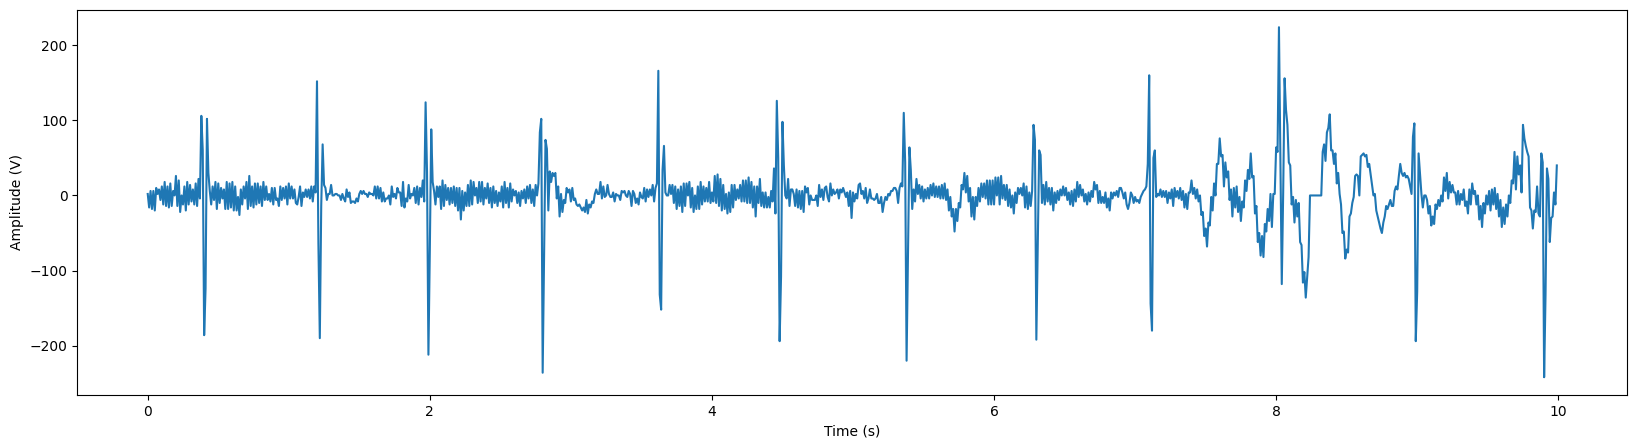

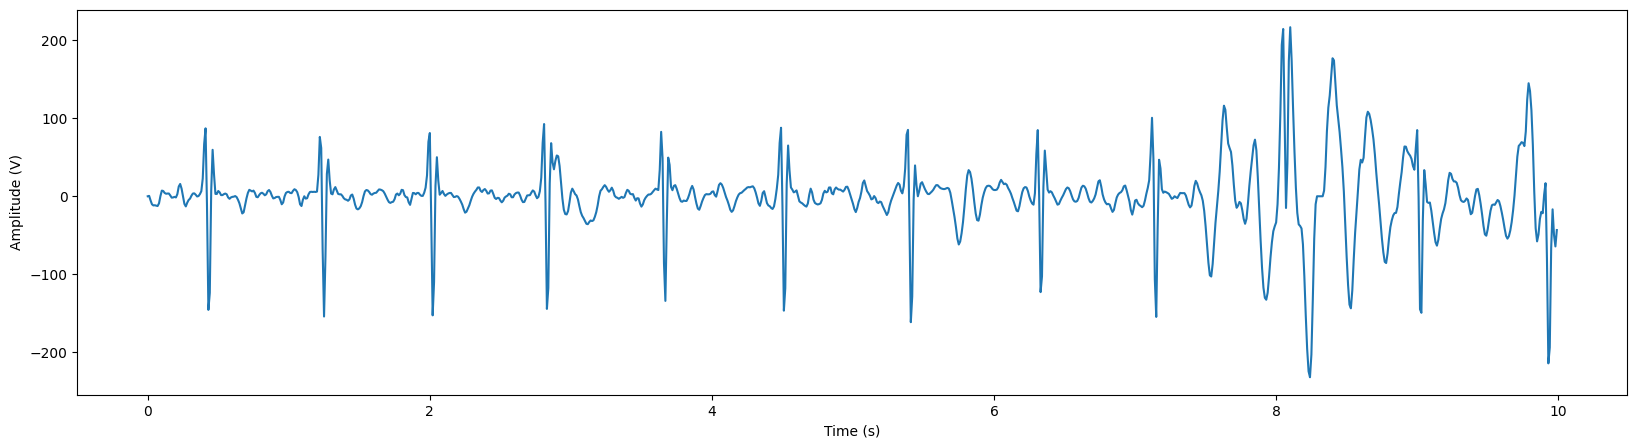

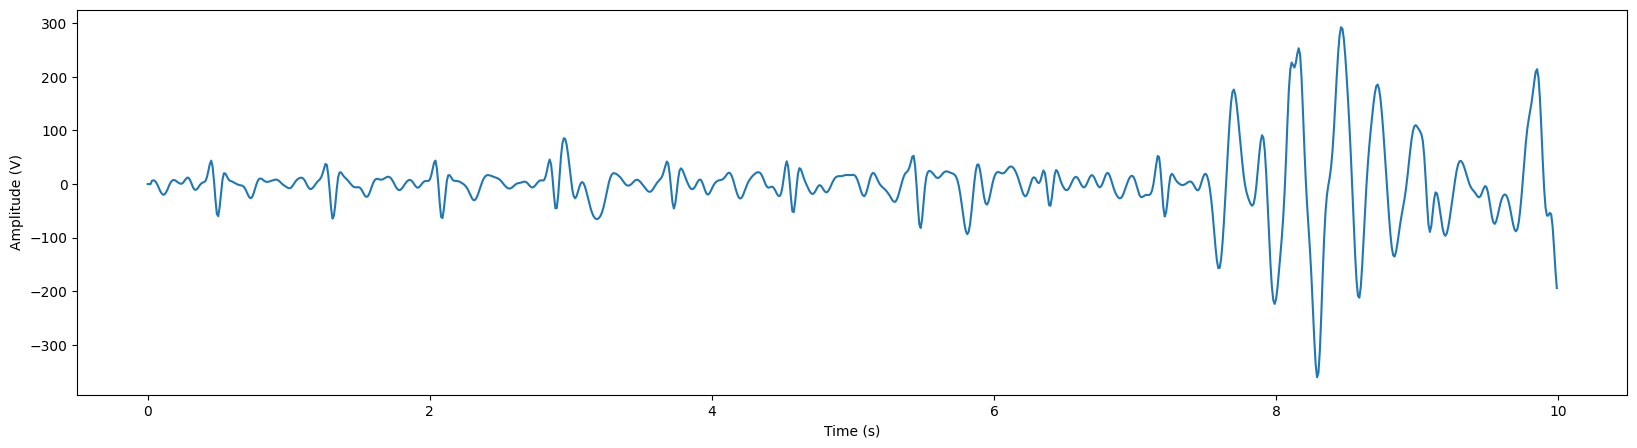

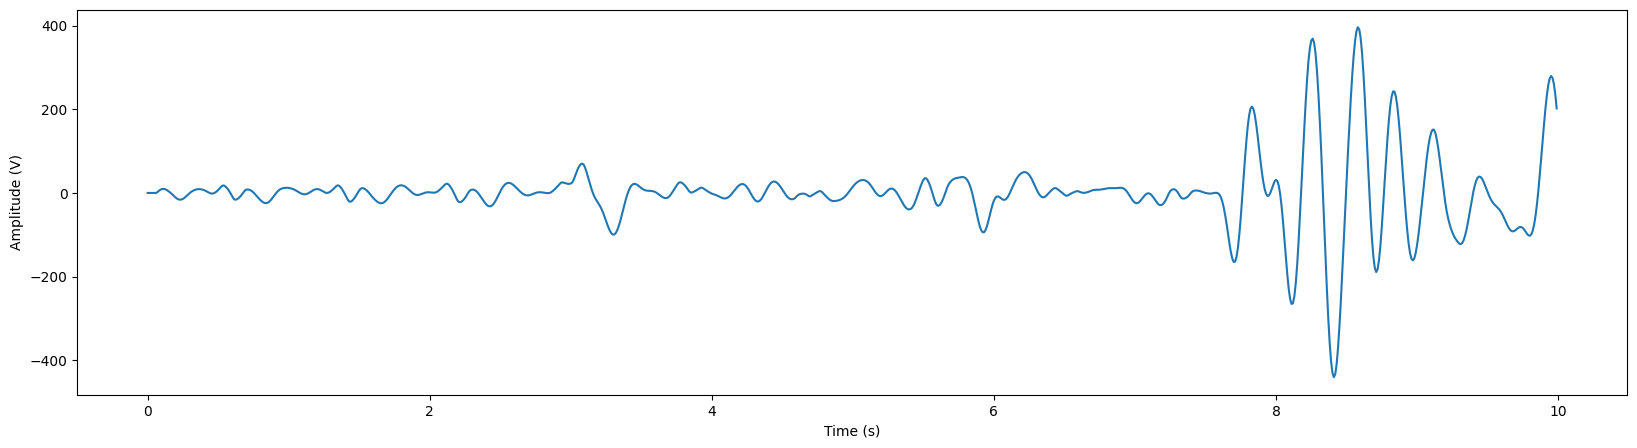

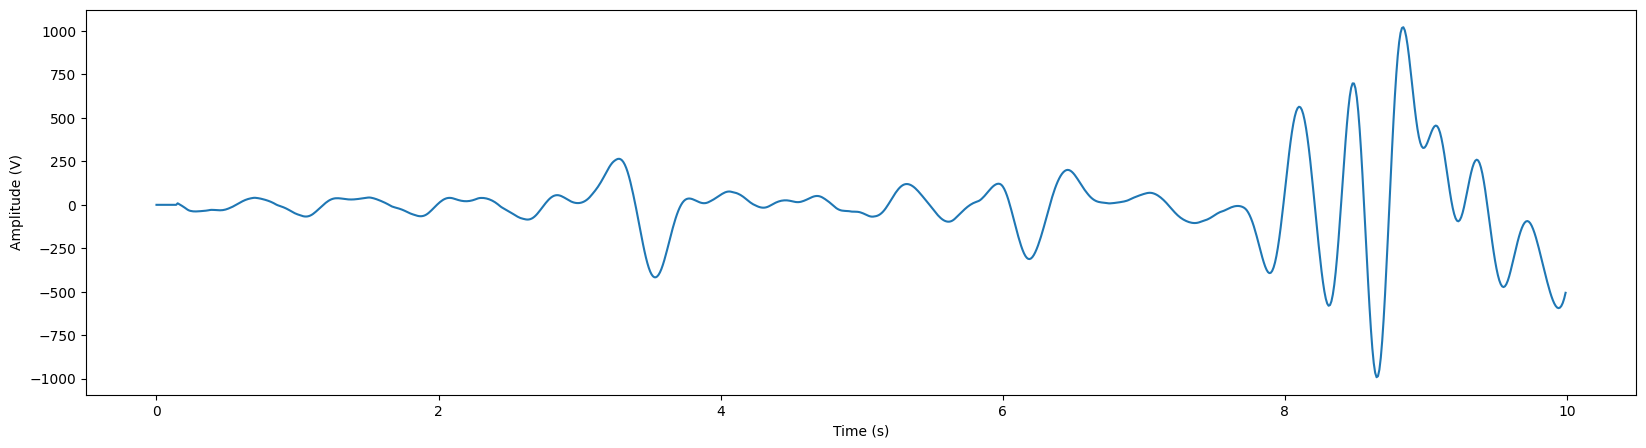

In [484]:
n = np.arange(1000)
for i in range(1,6):
    f = plt.figure()
    f.set_figwidth(20)
    print("orde {}".format(i))
    plt.plot(n/fs,w2fb[i][0:len(n)])
    plt.xlabel("Time (s)")
    plt.ylabel("Amplitude (V)")
    plt.show

In [485]:
gradien1 = np.zeros(jumlahdata)
gradien2 = np.zeros(jumlahdata)
gradien3 = np.zeros(jumlahdata)

In [486]:
delay3 = T3
delay2 = T2

for n in range(delay3,jumlahdata):
    gradien3[n] = w2fb[3][n-delay3] - w2fb[3][n+delay3]
    gradien2[n] = w2fb[2][n-delay2] - w2fb[2][n+delay2]

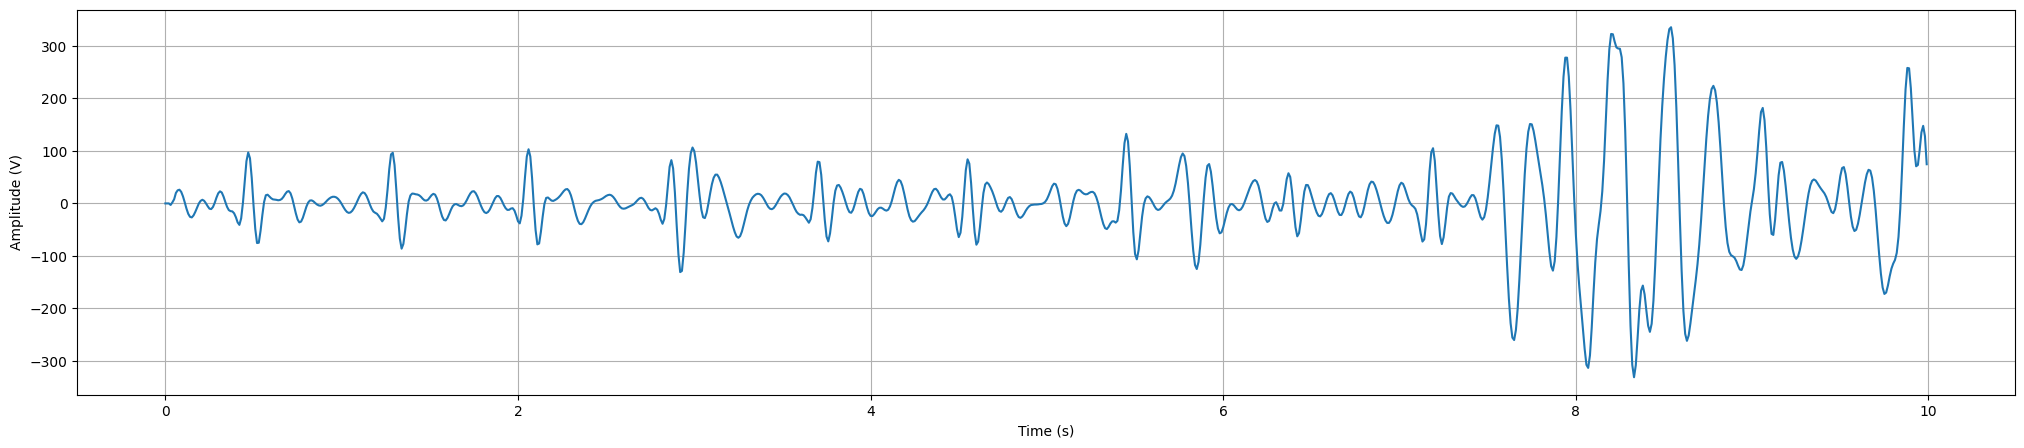

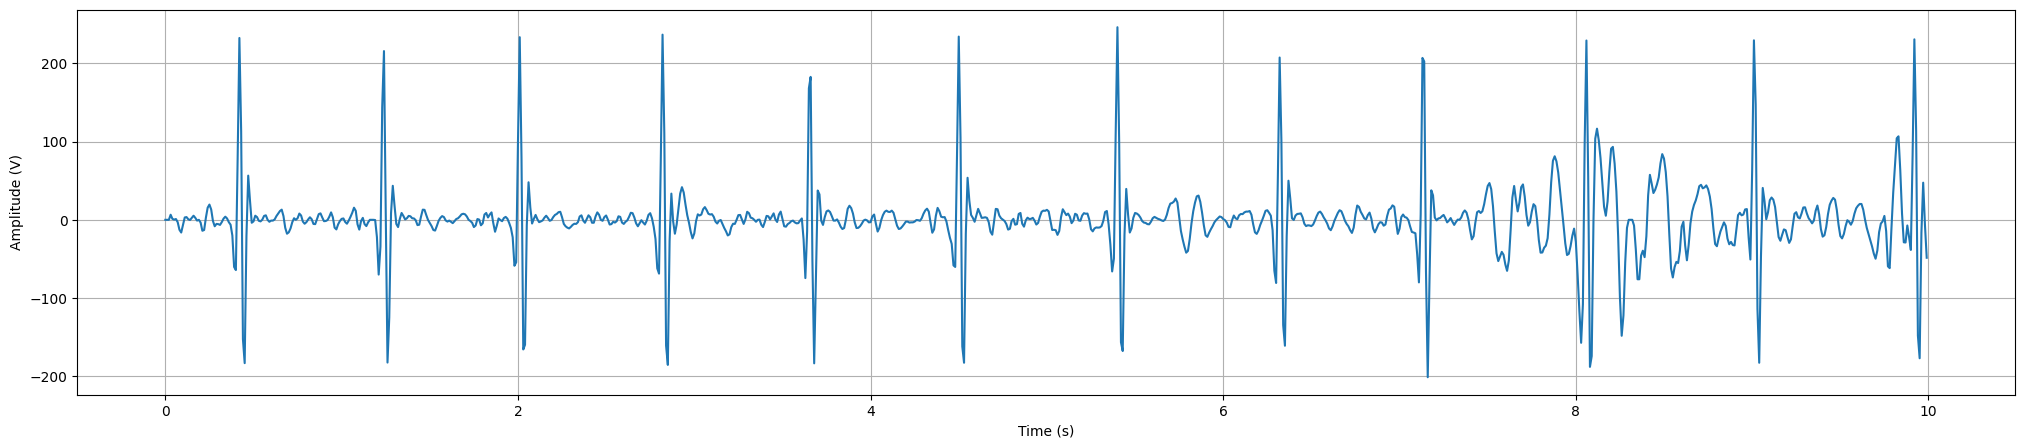

In [487]:
n = np.arange(jumlahdata)
plt.plot(n[0:1000]/fs,gradien3[0:1000])
plt.grid()
plt.xlabel("Time (s)")
plt.ylabel("Amplitude (V)")
plt.show()
plt.plot(n[0:1000]/fs,gradien2[0:1000])
plt.grid()
plt.xlabel("Time (s)")
plt.ylabel("Amplitude (V)")
plt.show()


In [488]:
hasilQRS = np.zeros(jumlahdata)

In [489]:
for n in range(jumlahdata):
    if gradien2[n] > 150:
        hasilQRS[n-(T3+1)] = 1
    else :
        hasilQRS[n-(T3+1)] = 0 


Text(0, 0.5, 'Amplitude (mV)')

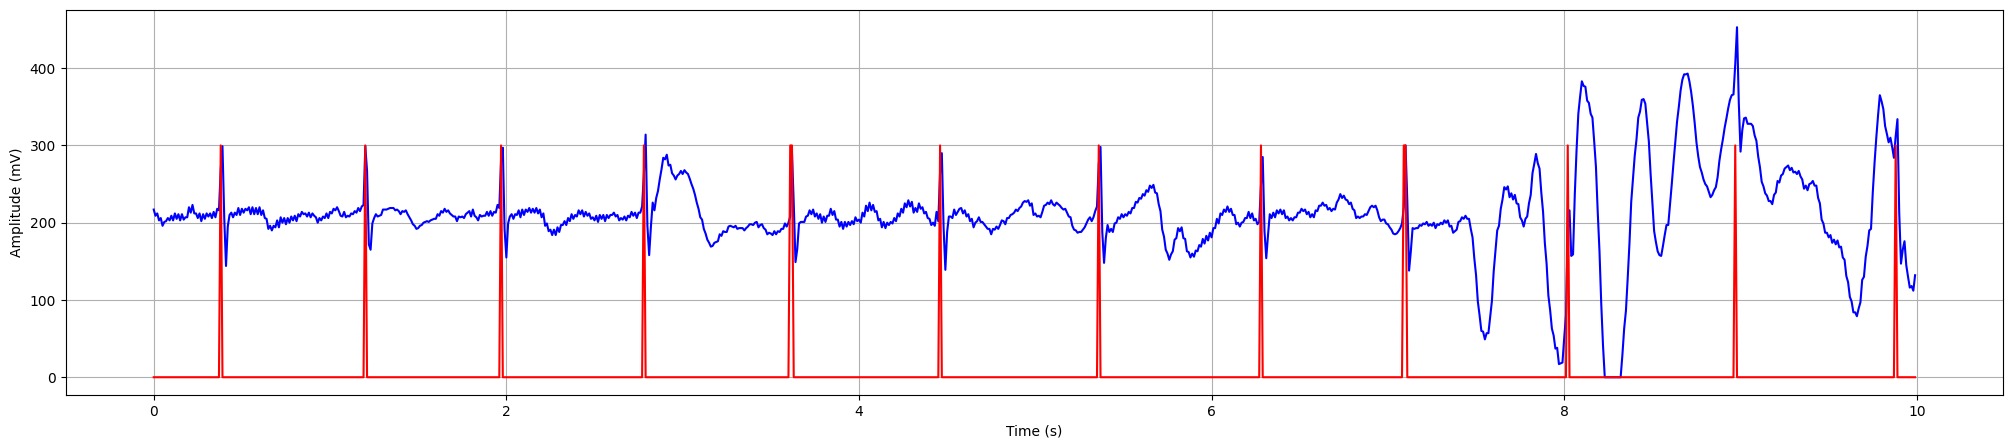

In [490]:
plt.plot(x[0:1000],y[0:1000],color="b")
plt.plot(x[0:1000],300*hasilQRS[0:1000],color="r")
plt.grid()
plt.xlabel("Time (s)")
plt.ylabel("Amplitude (mV)")

In [491]:
ptp = 0 
waktu = np.zeros(np.size(hasilQRS))
selisih = np.zeros(np.size(hasilQRS))
for n in range(np.size(hasilQRS)-1):
    if hasilQRS[n] <hasilQRS[n+1]:
        waktu[ptp] = n/fs 
        selisih[ptp] = waktu[ptp] -waktu[ptp-1]
        ptp +=1
ptp = ptp-1
ptp

134

In [492]:
j = 0 
peak = np.zeros(np.size(hasilQRS))
for n in range(np.size(hasilQRS)):
    if (hasilQRS[n]==1) and (hasilQRS[n-1]==0):
        peak[j] = n
        j+=1
j

135

In [493]:
temp = 0
interval = np.zeros(np.size(hasilQRS))
BPM = np.zeros(np.size(hasilQRS))
for n in range(ptp):
    interval[n] = (peak[n]-peak[n-1])*(1/fs)
    BPM[n] = 60/interval[n]
    temp = temp+ BPM[n]
    rata = temp/(n-1)
rata

72.4173739127798

Text(0, 0.5, 'bpm')

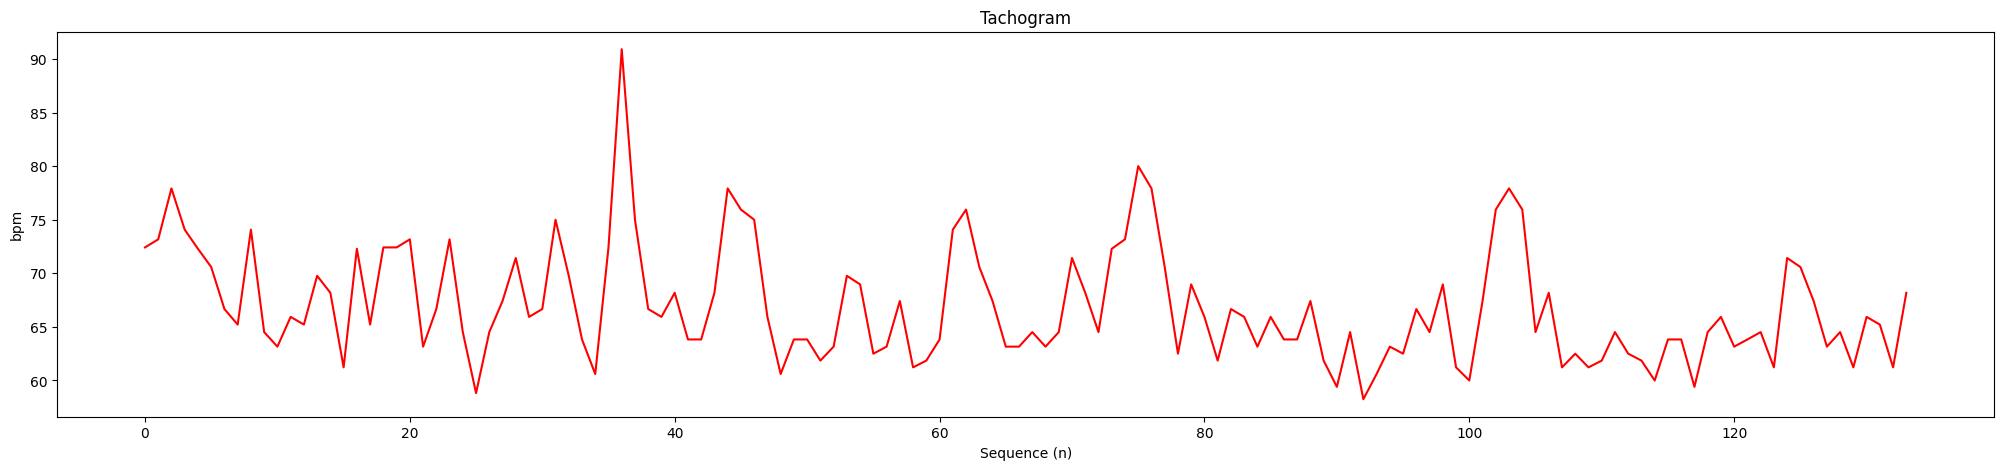

In [494]:
bpm_rr = np.zeros(ptp)
rr_t = np.zeros(ptp)
for n in range(ptp):
    bpm_rr[n] = 60/selisih[n]
    rr_t[n] = selisih[n]
    if bpm_rr[n] > 100:
        bpm_rr[n] = rata

mean_rr = np.sum(rr_t)/len(rr_t)
fs_hrv = 1/mean_rr

n = np.arange(ptp)
plt.rcParams["figure.figsize"] = (25,5)
plt.plot(n,bpm_rr,color="red")
plt.title("Tachogram")
plt.xlabel("Sequence (n)")
plt.ylabel("bpm")

Text(0, 0.5, 'bpm')

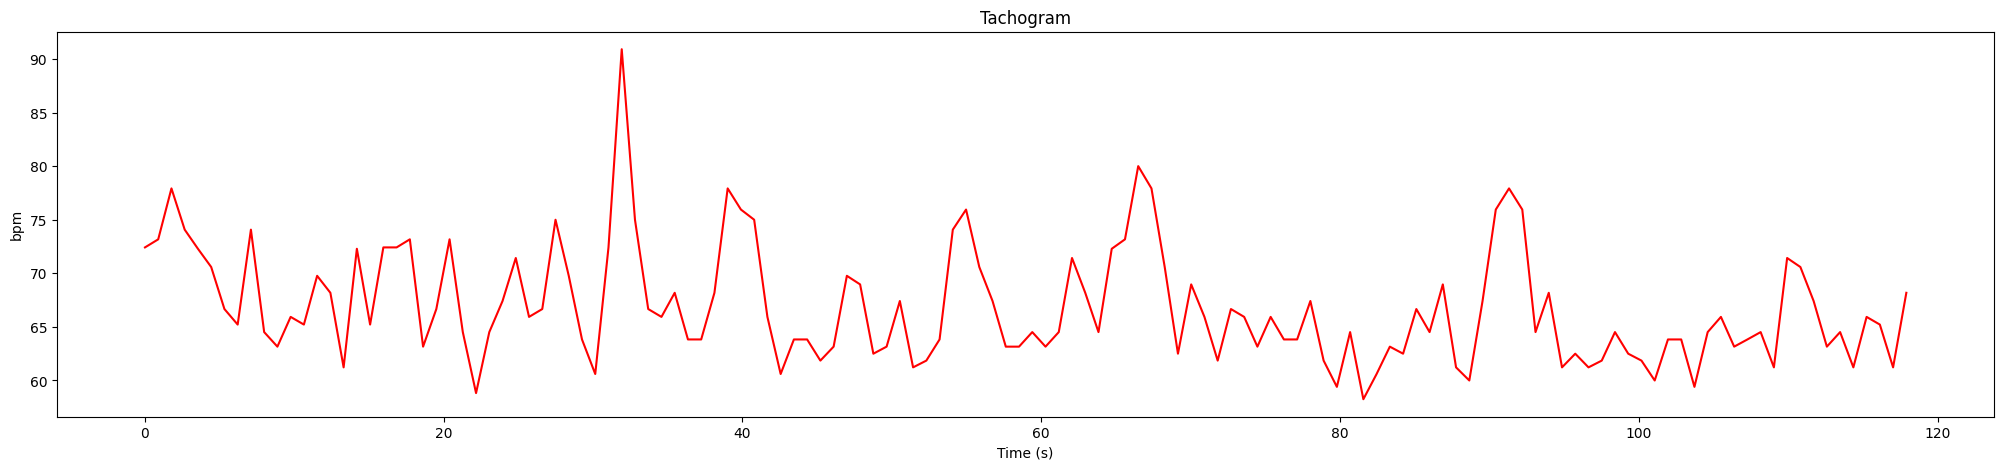

In [495]:
bpm_rr = np.zeros(ptp)
rr_t = np.zeros(ptp)
for n in range(ptp):
    bpm_rr[n] = 60/selisih[n]
    rr_t[n] = selisih[n]
    if bpm_rr[n] > 100:
        bpm_rr[n] = rata

mean_rr = np.mean(rr_t)
fs_hrv = 1/mean_rr

n = np.arange(ptp)
plt.rcParams["figure.figsize"] = (25,5)
plt.plot(n/fs_hrv,bpm_rr,color="red")
plt.title("Tachogram")
plt.xlabel("Time (s)")
plt.ylabel("bpm")

Text(0, 0.5, 'n')

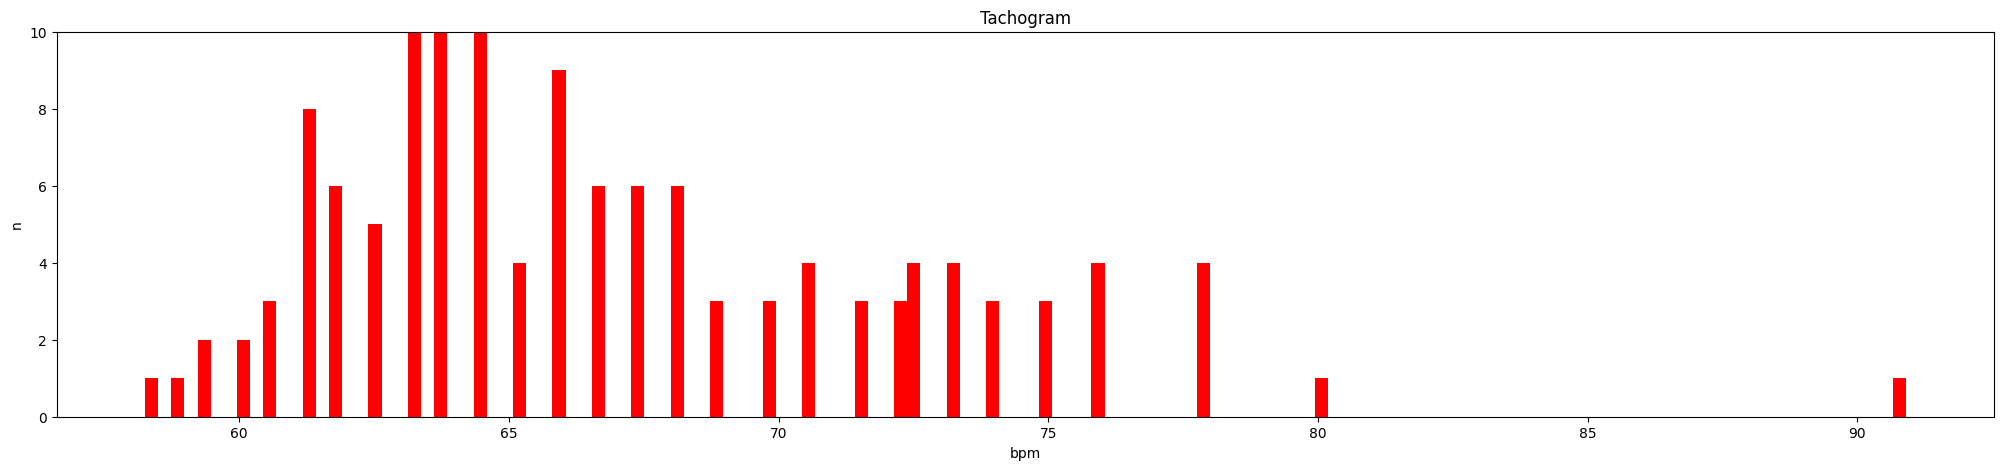

In [496]:
n = np.arange(ptp)
plt.rcParams["figure.figsize"] = (25,5)
plt.hist(bpm_rr,bins=ptp,color="red")
plt.title("Tachogram")
#plt.xlim(0,100)
plt.ylim(0,10)
plt.xlabel("bpm")
plt.ylabel("n")

In [497]:
RR_SDNN = 0

for n in range(ptp):
    RR_SDNN += (((rr_t[n])-(mean_rr))**2)

SDNN = np.sqrt(RR_SDNN/(ptp-1))
SDNN

0.12443015661851523

In [498]:
RR_RMSSD = 0
for n in range(ptp):
    RR_RMSSD += ((selisih[n+1]-selisih[n])**2)

RMSSD = np.sqrt(RR_RMSSD/(ptp-1))
RMSSD

0.13126051694348437

In [499]:
NN50 = 0 

for n in range(ptp):
    if (abs(selisih[n+1]-selisih[n]) > 0.05):
        NN50 += 1
pNN50 = (NN50/(ptp-1))*100
pNN50

51.127819548872175

In [500]:
dif = 0

for n in range(ptp):
    dif += abs(selisih[n]-selisih[n+1])
RRdif = dif/(ptp-1)

In [501]:
RR_SDSD = 0 

for n in range(ptp):
    RR_SDSD += (((abs(selisih[n]-selisih[n+1]))-RRdif)**2)

SDSD = np.sqrt(RR_SDSD/(ptp-2))
SDSD

0.10897221027005795

Text(0, 0.5, 'bpm')

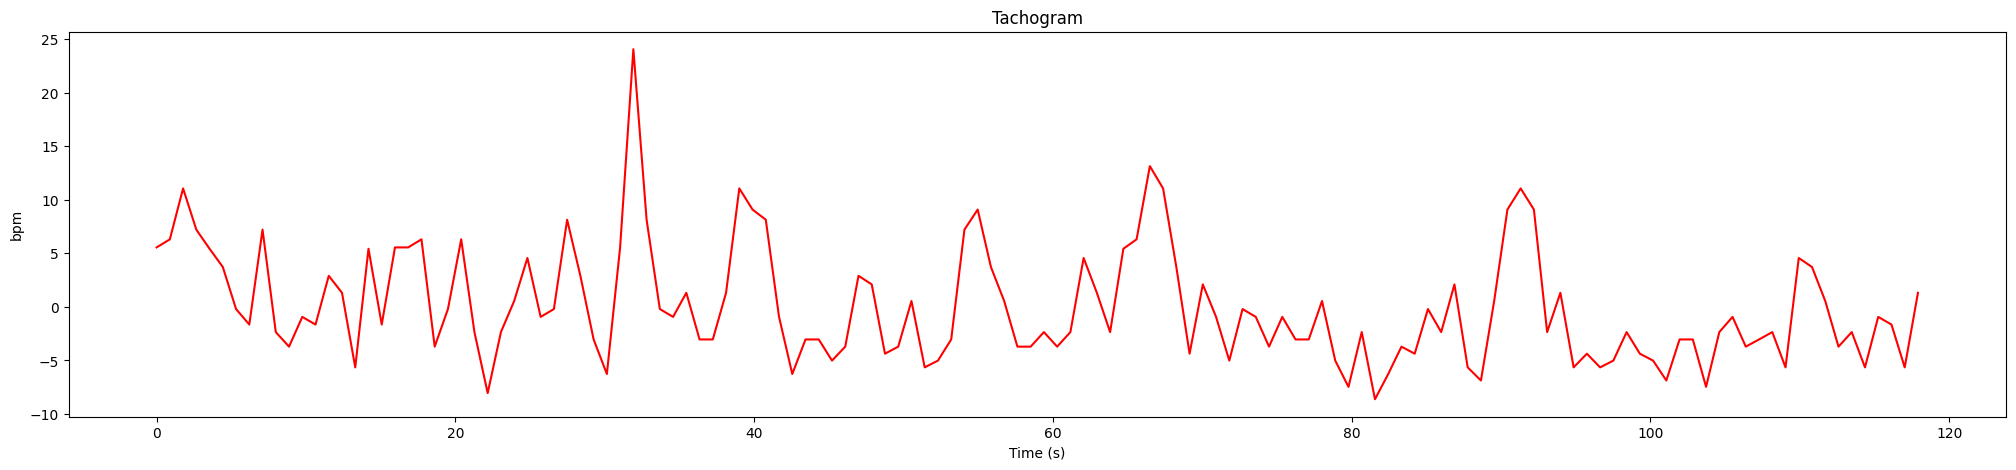

In [502]:
bpm_rrn = bpm_rr - (np.sum(bpm_rr)/len(bpm_rr))
n = np.arange(ptp)
plt.rcParams["figure.figsize"] = (25,5)
plt.plot(n/fs_hrv,bpm_rrn,color="red")
plt.title("Tachogram")
plt.xlabel("Time (s)")
plt.ylabel("bpm")

In [503]:
M=20
w=np.zeros(M)
for n in range(M-1):
    w[n]=0.54-0.46*np.cos((2*n*np.pi)/M)

In [504]:
T_bpm = 1/fs_hrv
N = ptp 
array_bpm = np.zeros(ptp)
array_bpmj = np.zeros(ptp)
sinyal_bpm = np.zeros(ptp)
nn = 0
while True :
    window_ptp = np.zeros(ptp)
    jj = 0 
    for i in range(round((M/2)*nn),round(((M/2)*nn))+M):
        if i >= ptp:
            continue
        else:
            window_ptp[i] = w[jj]
            jj += 1
    
    for i in range(ptp):
        sinyal_bpm[i] = bpm_rrn[i] * window_ptp[i]

    array_bpm1 = fft(sinyal_bpm)
    array_bpm2 = np.abs(array_bpm1)
    for i in range(ptp):
        array_bpm[i] += array_bpm2[i] 
        array_bpmj[i] += array_bpm1[i]
    
    nn += 1

    if round((M/2)*nn)> ptp :
        break



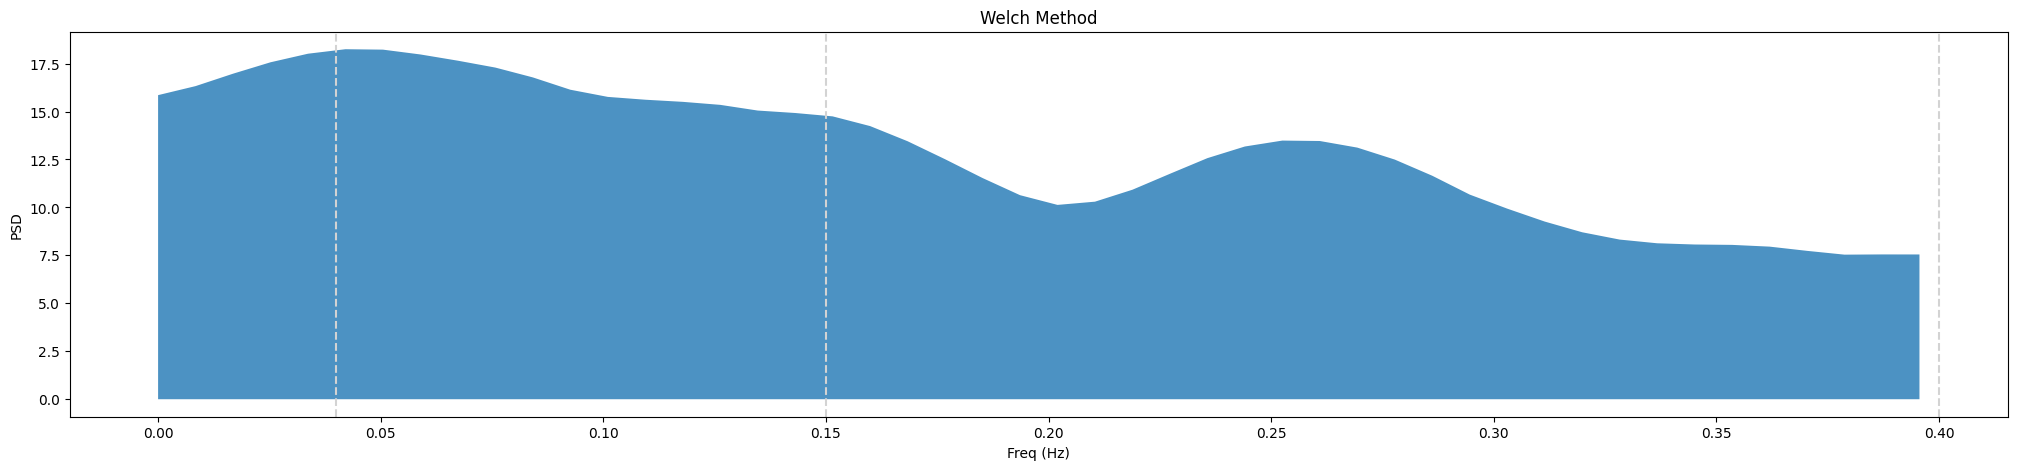

In [505]:
k = np.arange(0,ptp//2,1,dtype=int) 
array_bpm = array_bpm/nn

VLH_PSD = np.zeros(ptp//2)
LF_PSD = np.zeros(ptp//2)
HF_PSD = np.zeros(ptp//2)
TLP_PSD = np.zeros(ptp//2)

for i in range(ptp//2):
    if i*fs_hrv/ptp > 0.003 and i*fs_hrv/ptp < 0.04:
        VLH_PSD[i] = array_bpm[i]
    elif i*fs_hrv/ptp >= 0.04 and i*fs_hrv/ptp < 0.15:
        LF_PSD[i] = array_bpm[i]
    elif i*fs_hrv/ptp > 0.15 and i*fs_hrv/ptp < 0.4:
        HF_PSD[i] = array_bpm[i]

for i in range(ptp//2):
    if i*fs_hrv/ptp < 0.4:
        TLP_PSD[i] = array_bpm[i]


plt.title("Welch Method")
plt.xlabel("Freq (Hz)")
plt.ylabel("PSD")
plt.fill_between(k*fs_hrv/ptp,array_bpm[0:ptp//2],where=k*fs_hrv/ptp < 0.4,alpha=0.8,linewidth = 5)
plt.annotate("VLH",(0.015,20),size=12 ,bbox = dict(boxstyle="round",color="green",pad = 0.8),color="white",weight="bold")
plt.annotate("LF",(0.09,20),size=12 ,bbox = dict(boxstyle="round",color="green",pad = 0.8),color="white",weight="bold")
plt.annotate("HF",(0.27,20),size=12 ,bbox = dict(boxstyle="round",color="green",pad = 0.8),color="white",weight="bold")
plt.axvline(x=0.04,color="#D3D3D3", linestyle="--")
plt.axvline(x=0.15,color="#D3D3D3", linestyle="--")
plt.axvline(x=0.4,color="#D3D3D3", linestyle="--")

In [506]:
TLP = 0
VLH_P = 0 
LF_P = 0 
HF_P = 0  

for i in range(ptp//2):
    TLP += TLP_PSD[i]
    VLH_P += VLH_PSD[i]
    LF_P += LF_PSD[i]
    HF_P += HF_PSD[i]
    

LF = (LF_P) /(TLP-VLH_P)
HF = (HF_P) / (TLP-VLH_P)

Ratio_LF_HF = LF/HF

print("LF =",LF)
print("HF =",HF)
print("Ratio LH/HF =",Ratio_LF_HF)


LF = 0.39000495032249416
HF = 0.581169956915527
Ratio LH/HF = 0.6710686705011171


Text(0, 0.5, 'Parasympathetic NS - LF')

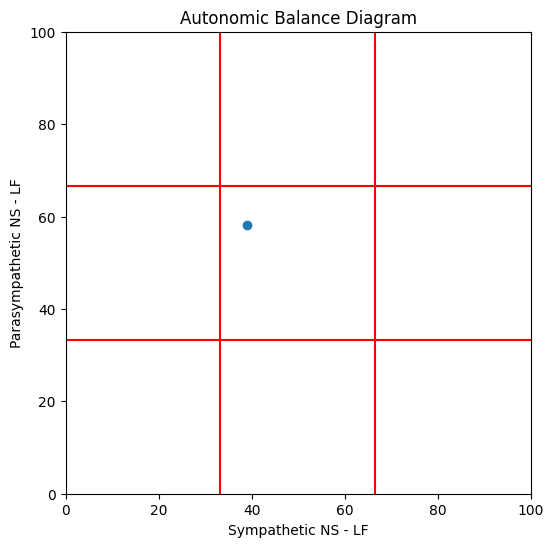

In [507]:
plt.rcParams["figure.figsize"] = (6,6)
plt.ylim(0,100)
plt.xlim(0,100)
plt.axhline(y=33.3, color = 'r', linestyle = '-')
plt.axhline(y=66.6, color = 'r', linestyle = '-')
plt.axvline(x=33.3, color = 'r', linestyle = '-')
plt.axvline(x=66.6, color = 'r', linestyle = '-')
plt.scatter(LF*100,HF*100)
plt.title("Autonomic Balance Diagram")
plt.xlabel("Sympathetic NS - LF")
plt.ylabel("Parasympathetic NS - LF")

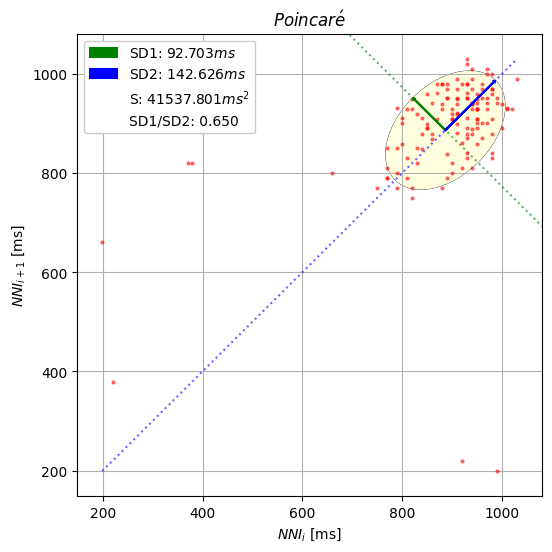

In [508]:
results = pyhrv.nonlinear.poincare(nni=rr_t)

In [509]:
SD1 = results["sd1"]
SD2 = results["sd2"]
SD_Ratio = results["sd_ratio"]

print("SD1 =",SD1)
print("SD2 =",SD2)
print("Ratio SD =",SD_Ratio)

SD1 = 92.7030797064159
SD2 = 142.62624969730922
Ratio SD = 1.5385276319729233


In [510]:
SD1_B = np.sqrt((np.square(SDSD*1000))/2)
SD2_B =  np.sqrt((2*((SDNN*1000)**2))-(((SDSD*1000)**2)/2))
SD_Ratio_B = SD2_B / SD1_B


print("SD1 =",SD1_B)
print("SD2 =",SD2_B)
print("Ratio SD =",SD_Ratio_B)

SD1 = 77.05498884284431
SD2 = 158.20321250418905
Ratio SD = 2.0531209579025274


Respiratory Rate 

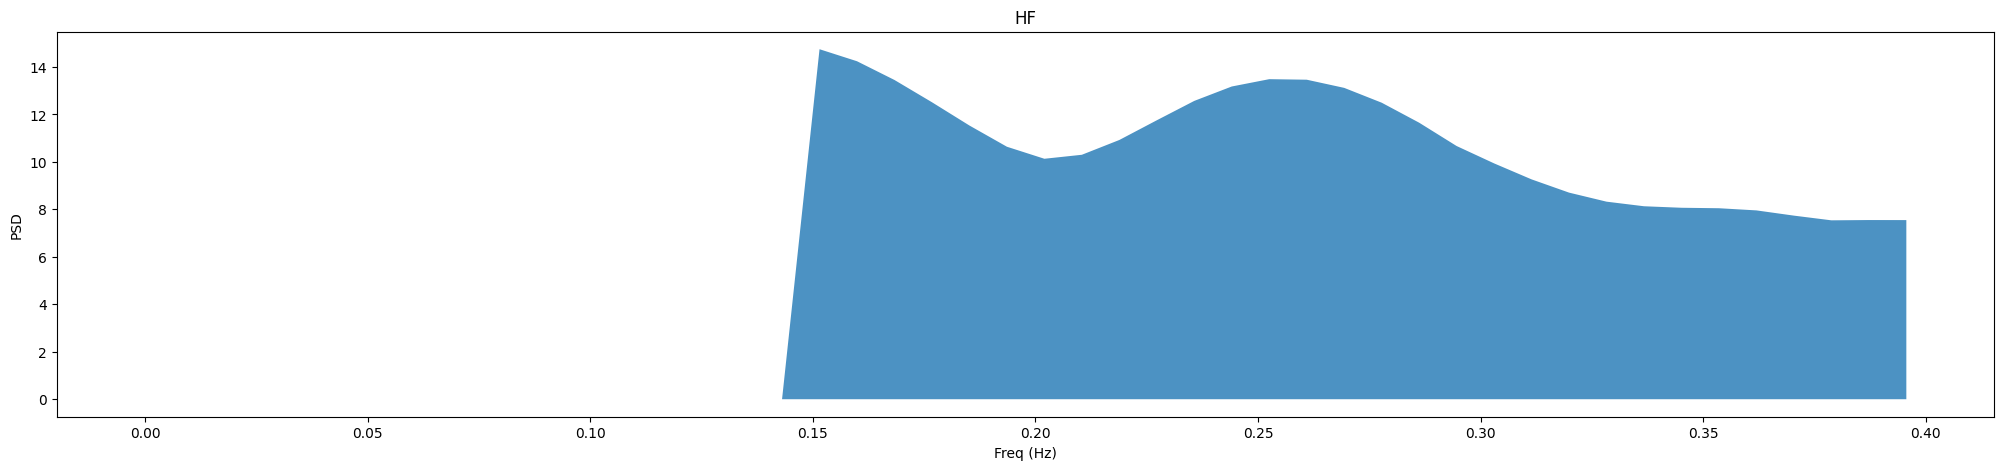

In [511]:
k = np.arange(0,ptp//2,1,dtype=int) 
plt.rcParams["figure.figsize"] = (25,5)
plt.title("HF")
plt.xlabel("Freq (Hz)")
plt.ylabel("PSD")
plt.fill_between(k*fs_hrv/ptp,HF_PSD[0:ptp//2],where=k*fs_hrv/ptp < 0.4 ,alpha=0.8,linewidth = 5)

In [512]:
MPFx = 0
MPFy = 0

for i in range(ptp//2):
    MPFx += (i*fs_hrv/ptp) * HF_PSD[i]
    MPFy += HF_PSD[i]

MPF = MPFx / MPFy 
MPF   

0.2606787320509101

In [513]:
RRT = MPF * 60
RRT

15.640723923054605

Respiratory Signal

Text(0, 0.5, 'Amplitude')

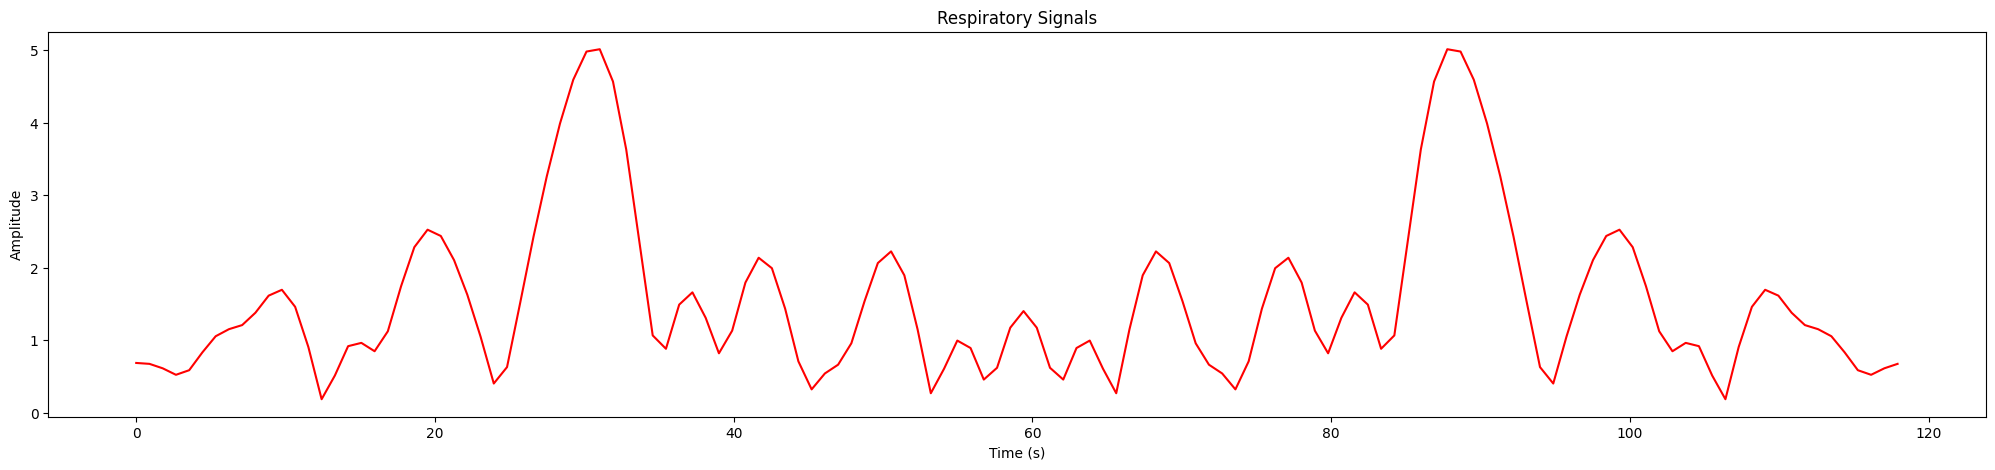

In [514]:
import scipy.fft
HF_plt = np.zeros(ptp)

for i in range(ptp):
    if i*fs_hrv/ptp > 0.15 and i*fs_hrv/ptp < 0.4:
        HF_plt[i] = array_bpmj[i]

respi_signal = scipy.fft.ifft(HF_plt)

respi_signal = np.abs(respi_signal)

nnn = np.arange(len(respi_signal))

plt.plot(nnn/fs_hrv,respi_signal,color="red")
plt.title("Respiratory Signals")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
    